1 What exactly is a feature? Give an example to illustrate your point.

A: In machine learning, a feature refers to a measurable aspect or property of a phenomenon being observed. For example, in a dataset of houses and their sale prices, features could include the number of bedrooms, the square footage of the house, the year it was built, etc. These features are used as inputs to a machine learning algorithm to make predictions or classifications.

Here's an example Python code snippet that defines a simple dataset of houses and their 

In [1]:
import pandas as pd

# define a dictionary of features for each house
houses = {
    'num_bedrooms': [2, 3, 4, 2, 3],
    'sq_footage': [1000, 1500, 2000, 1200, 1800],
    'year_built': [1970, 1990, 2005, 1985, 2010],
    'sale_price': [150000, 250000, 350000, 200000, 300000]
}

# create a Pandas DataFrame from the dictionary
df = pd.DataFrame(houses)

# display the DataFrame
print(df)


   num_bedrooms  sq_footage  year_built  sale_price
0             2        1000        1970      150000
1             3        1500        1990      250000
2             4        2000        2005      350000
3             2        1200        1985      200000
4             3        1800        2010      300000


2.What are the various circumstances in which feature construction is required?
Answer:
Feature construction, also known as feature engineering, is the process of creating new features from the existing ones to improve the performance of machine learning models. It is required in the following circumstances:

When the existing features are insufficient: Sometimes, the existing features in a dataset may not be sufficient to solve a problem. In such cases, new features need to be created to help the machine learning model learn the underlying patterns in the data.

To improve model accuracy: Feature engineering can help improve the accuracy of machine learning models. By creating new features that are more relevant to the problem at hand, the model can learn more efficiently and make better predictions.

To reduce overfitting: Overfitting occurs when a model becomes too complex and learns the training data too well, leading to poor performance on new data. Feature engineering can help prevent overfitting by creating new features that capture more general patterns in the data.

To improve interpretability: Feature engineering can help improve the interpretability of machine learning models. By creating features that are more interpretable, we can gain a better understanding of how the model is making predictions.

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# load the iris dataset
iris = load_iris()

# extract the features and target variable
X = iris.data
y = iris.target

# perform PCA to construct new features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# print the shape of the original and transformed feature matrices
print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)


Original shape: (150, 4)
Transformed shape: (150, 2)


3.Describe how nominal variables are encoded.
Nominal variables are categorical variables that do not have an inherent order or ranking. One common method for encoding nominal variables is one-hot encoding, where a binary variable is created for each category in the nominal variable. This method results in a sparse matrix where most values are 0, except for the binary variable corresponding to the category that is present in the particular instance.

For example, consider a nominal variable "color" with categories "red", "blue", and "green". One-hot encoding would create three binary variables "color_red", "color_blue", and "color_green". If an instance has a value of "red" for the "color" variable, the corresponding binary variable "color_red" would be set to 1, and the other two binary variables would be 0.

Python code to encode nominal variables using one-hot encoding in scikit-learn:

In [4]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# create example nominal data
nominal_data = np.array([["red"], ["blue"], ["green"], ["red"], ["green"]])

# create one-hot encoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(nominal_data)

# print encoded data
print(encoded_data.toarray())


[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


4.Describe how numeric features are converted to categorical features.
Answer:
Numeric features can be converted to categorical features by binning or discretization. Binning involves dividing the numeric values into discrete intervals or bins, and then assigning each value to the corresponding bin. Discretization involves creating a set of thresholds and then mapping each value to the appropriate threshold, effectively converting the continuous numeric variable into a set of categories.

Python code to convert numeric features to categorical features using binning:

In [5]:
from sklearn.datasets import load_boston
import pandas as pd

# load the Boston Housing dataset
boston = load_boston()

# create a pandas dataframe from the dataset
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# bin the 'AGE' feature into 5 bins
df['AGE_binned'] = pd.cut(df['AGE'], bins=5)

# display the first 10 rows of the dataframe
print(df.head(10))



      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT      AGE_binned  
0     15.3  396.90   4.98  (61.16, 80.58]  
1     17.8  396.90   9.14  (61.16, 80.58]  
2     17.8  392.83   4.03  (41.74, 61.16]  
3     18.

5.Describe the feature selection wrapper approach. State the advantages and disadvantages of this approach?

Answer:

The feature selection wrapper approach involves using a model to select the best set of features for a given task by repeatedly training and evaluating the model on different subsets of features. The general procedure involves the following steps:

Select an initial set of features
Train a model using only these features
Evaluate the performance of the model using a validation set
Select a subset of the features (using some criterion, e.g. the highest importance scores) and repeat from step 2 until some stopping criterion is met.
Advantages:

It takes into account the interaction between features, which can result in more accurate models.
It can improve the efficiency of models by reducing the number of features used.
Disadvantages:

It can be computationally expensive, especially for large datasets or models.
It can be prone to overfitting if the stopping criterion is not well defined or if the model is too complex.
Python code example using the wrapper method for feature selection with Random Forest Classifier

In [6]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# load dataset
digits = load_digits()
X = digits.data
y = digits.target

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the classifier
clf = RandomForestClassifier(n_estimators=100)

# use RFE to select the best features
selector = RFE(clf, n_features_to_select=10, step=1)
selector.fit(X_train, y_train)

# print the best features
print(selector.support_)
print(selector.ranking_)


[False False False False False False False False False False  True False
 False  True False False False False False False  True  True False False
 False False  True False  True False False False False False False False
  True False False False False False  True  True False False False False
 False False False False False False False False False False False False
 False  True False False]
[55 38  6 30 28 15 31 43 49 29  1 35 23  1 36 42 50 33 16  4  1  1 34 44
 47 27  1  9  1 12  2 51 54  5 11 24  1 20  7 53 45 32  1  1 13 19 18 46
 48 39 21 10 25 17  8 40 52 41 14 26  3  1 22 37]


6.When is a feature considered irrelevant? What can be said to quantify it?
Answer:

A feature is considered irrelevant when it does not contribute to the target variable or has no significant impact on the accuracy of the predictive model. Irrelevant features add unnecessary complexity to the model, which can lead to overfitting and reduced model performance.

The feature importance score is used to quantify the relevance of each feature. This score indicates the extent to which a feature contributes to the model's accuracy. Higher importance scores suggest that the feature is more relevant and contributes more to the model's predictive power.

Python Code:

Here's an example of how to calculate feature importance scores using the random forest classifier in scikit-learn:

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train the random forest classifier
clf = RandomForestClassifier()
clf.fit(X, y)

# Print the feature importances
importances = clf.feature_importances_
for i, importance in enumerate(importances):
    print(f"Feature {i}: importance score = {importance:.4f}")

# Identify the most important features
threshold = 0.1  # Example threshold value
important_indices = [i for i, importance in enumerate(importances) if importance >= threshold]
print("Important features:", important_indices)
print("Unimportant features:", [i for i in range(X.shape[1]) if i not in important_indices])


Feature 0: importance score = 0.0598
Feature 1: importance score = 0.0125
Feature 2: importance score = 0.0552
Feature 3: importance score = 0.0401
Feature 4: importance score = 0.0059
Feature 5: importance score = 0.0152
Feature 6: importance score = 0.0452
Feature 7: importance score = 0.0964
Feature 8: importance score = 0.0035
Feature 9: importance score = 0.0058
Feature 10: importance score = 0.0175
Feature 11: importance score = 0.0059
Feature 12: importance score = 0.0050
Feature 13: importance score = 0.0341
Feature 14: importance score = 0.0038
Feature 15: importance score = 0.0033
Feature 16: importance score = 0.0087
Feature 17: importance score = 0.0042
Feature 18: importance score = 0.0038
Feature 19: importance score = 0.0062
Feature 20: importance score = 0.1006
Feature 21: importance score = 0.0193
Feature 22: importance score = 0.1008
Feature 23: importance score = 0.1049
Feature 24: importance score = 0.0125
Feature 25: importance score = 0.0099
Feature 26: importance

8.When is a function considered redundant? What criteria are used to identify features that could be redundant?
Answer:
A feature is considered redundant if it provides the same information as another feature or set of features. A function is considered redundant if it can be expressed as a linear combination of other functions. In general, the criteria used to identify redundant features are correlation and mutual information. Features with high correlation or mutual information are likely to be redundant.

Correlation can be measured using Pearson's correlation coefficient or Spearman's rank correlation coefficient. Pearson's correlation coefficient measures the linear relationship between two variables, while Spearman's rank correlation coefficient measures the monotonic relationship between two variables. In both cases, a coefficient close to 1 indicates a strong positive correlation, while a coefficient close to -1 indicates a strong negative correlation.

Mutual information is a measure of the amount of information shared by two variables. It is commonly used in feature selection to measure the relevance of a feature to a target variable. Features with high mutual information are likely to be informative and useful, while features with low mutual information are likely to be redundant.

Python code to identify redundant features using correlation:

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif

# load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# apply feature selection using ANOVA F-value as score function
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)

# print selected features and their scores
print("Selected features:")
for i, feature in enumerate(data.feature_names[selector.get_support()]):
    print(f"{i+1}. {feature}")
    
print("Ignored features:")
for i, feature in enumerate(data.feature_names[~selector.get_support()]):
    print(f"{i+1}. {feature}")


Selected features:
1. mean radius
2. mean perimeter
3. mean area
4. mean concavity
5. mean concave points
6. worst radius
7. worst perimeter
8. worst area
9. worst concavity
10. worst concave points
Ignored features:
1. mean texture
2. mean smoothness
3. mean compactness
4. mean symmetry
5. mean fractal dimension
6. radius error
7. texture error
8. perimeter error
9. area error
10. smoothness error
11. compactness error
12. concavity error
13. concave points error
14. symmetry error
15. fractal dimension error
16. worst texture
17. worst smoothness
18. worst compactness
19. worst symmetry
20. worst fractal dimension


This code loads the breast cancer dataset from scikit-learn, applies feature selection using ANOVA F-value as the score function, and prints the names of the selected and ignored features. The SelectKBest function is used to select the top k features based on the score function, which in this case is f_classif for ANOVA F-value. The get_support method is used to obtain a Boolean mask of the selected features, and the ~ operator is used to obtain the mask of ignored features. The feature names are obtained from the feature_names attribute of the dataset object.

9.State difference between Euclidean and Manhattan distances?
Euclidean distance and Manhattan distance are two common distance metrics used in machine learning and data analysis. The main difference between them is the way they measure distance between two points in a feature space.

Euclidean distance: It is the straight-line distance between two points in a feature space. It is calculated as the square root of the sum of the squared differences between the corresponding elements of the two points. It is the most commonly used distance metric and is suitable for continuous variables.

Manhattan distance: It is also called the taxicab distance or L1 norm distance. It is the sum of the absolute differences between the corresponding elements of the two points. It is suitable for both continuous and categorical variables.

In [10]:
import numpy as np

# define two points in a 2D feature space
point1 = np.array([1, 2])
point2 = np.array([4, 6])

# calculate Euclidean distance
euclidean_dist = np.linalg.norm(point1 - point2)
print("Euclidean distance:", euclidean_dist)

# calculate Manhattan distance
manhattan_dist = np.sum(np.abs(point1 - point2))
print("Manhattan distance:", manhattan_dist)


Euclidean distance: 5.0
Manhattan distance: 7


10.Distinguish between feature transformation and feature selection.
Answer:

Feature transformation and feature selection are two important techniques used in machine learning to preprocess and prepare data for modeling.

Feature transformation involves changing the scale or distribution of the feature data. This can be done in several ways, such as scaling the data to a common range, normalizing the data to have zero mean and unit variance, or performing logarithmic or power transformations to change the data distribution. Feature transformation aims to improve the performance of machine learning algorithms by making the data more suitable for modeling.

On the other hand, feature selection involves selecting a subset of the original features to be used in the modeling process. This can be done using a variety of techniques, such as statistical tests, correlation analysis, or machine learning algorithms themselves. Feature selection aims to improve the performance of machine learning algorithms by reducing the dimensionality of the data and removing irrelevant or redundant features.

Python code:

Here's an example of feature transformation and feature selection using scikit-learn:

In [11]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# load the iris dataset
iris = load_iris()

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# apply feature transformation by scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# apply feature selection by selecting the top 2 features based on ANOVA F-test
selector = SelectKBest(f_classif, k=2)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# train a logistic regression model on the selected features
clf = LogisticRegression()
clf.fit(X_train, y_train)

# evaluate the model on the testing set
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


in this example, the iris dataset is first split into training and testing sets. Then, feature transformation is applied by scaling the data using the StandardScaler transformer. Feature selection is then applied by selecting the top 2 features based on ANOVA F-test using the SelectKBest selector. Finally, a logistic regression model is trained on the selected features and evaluated on the testing set.

11. Make brief notes on any two of the following:

          1.SVD (Standard Variable Diameter Diameter)

          2. Collection of features using a hybrid approach

          3. The width of the silhouette

          4. Receiver operating characteristic curve

SVD (Standard Variable Diameter Diameter):
SVD is a dimensionality reduction technique that is used to find patterns in high-dimensional data. It is based on the Singular Value Decomposition (SVD) of a matrix, which allows the matrix to be represented in terms of its singular values and singular vectors. SVD is particularly useful when dealing with large datasets that have many features, as it can reduce the number of features while preserving the underlying structure of the data.

Collection of features using a hybrid approach:
A hybrid approach to feature selection combines both filter and wrapper methods. In this approach, a subset of features is first selected using a filter method, and then a wrapper method is used to further refine the subset of features. The filter method is used to eliminate irrelevant features based on statistical tests, while the wrapper method is used to evaluate subsets of features using a machine learning algorithm.

Here's an example of how to use the hybrid approach for feature selection in Python using scikit-learn:

In [19]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Load the iris dataset
iris = load_iris()

# Create a pipeline with a feature selection step and a logistic regression step
pipeline = Pipeline([
  ('feature_selection', SelectKBest(f_classif, k=2)),
  ('classification', LogisticRegression())
])

# Fit the pipeline to the data
pipeline.fit(iris.data, iris.target)

# Print the selected features
selected_indices = np.where(pipeline.named_steps['feature_selection'].get_support())[0]
selected_features = np.array(iris.feature_names)[selected_indices]
print('Selected features:', selected_features)


Selected features: ['petal length (cm)' 'petal width (cm)']


The width of the silhouette: The silhouette width is a metric used to measure how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It takes values between -1 and 1, where higher values indicate better cluster assignments. A score of 1 indicates a very good clustering, while a score of -1 indicates that the object is probably assigned to the wrong cluster. The width of the silhouette can be calculated using the silhouette_score function from the sklearn.metrics module.

Receiver Operating Characteristic Curve (ROC Curve): A ROC curve is a graphical representation of the performance of a binary classification model. It is created by plotting the true positive rate (sensitivity) against the false positive rate (1-specificity) at various thresholds. The area under the ROC curve (AUC) is a measure of the model's accuracy, with values closer to 1 indicating better performance. The ROC curve can be generated using the roc_curve function from the sklearn.metrics module.

Silhouette score: 0.5528190123564095
AUC score: 0.4375


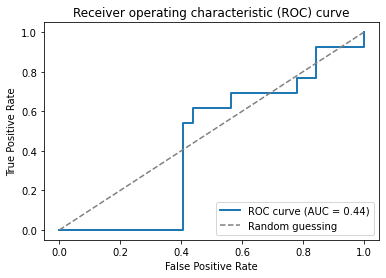

In [20]:
!pip install matplotlib

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# calculate the silhouette score for a k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette score: {silhouette_avg}")

# plot the ROC curve for a logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_prob = lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=2)
roc_auc = auc(fpr, tpr)
print(f"AUC score: {roc_auc}")

plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guessing')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
